# Portfolio 1

## Diagnosis of COVID-19 and its clinical spectrum ( COVID 19 ) 



'''

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.




Exploratory Data Analysis


I - Analyse de la forme:

	§ Identification de la target : SARS-Cov-2 exam result

	§ Nombre des lignes et de colonnes : (5644, 111)

	§ Identification des valeurs manquantes : beaucoup de valeurs manquantes. On peut distinguer 2 groupes de données : Test_viral --> 76% environ et taux sanguins --> 89%

	§ Types de variables : 74 variables continues , 37 variables discrètes 


II - Analyse du fond:

	§ Visualisation de la target (histogramme/boxplot) : 10% de valeurs positives

	§ Compréhension des différentes variables (recherche) : 
    
    * Variables continues standardisées (loi normale (0,1)) , skewed ou distribution( asymétrique ) , la plupart sont des tests sanguins 
    
    * Variables quantile age : on ne sait pas comment l'interpreter car aucune précision n'a été apportée par         l'auteur
    
    * Variables qualitatives : elles sont binaires , la plupart sont des virus , le Rhinovirus semble etre elevé.



	§ Visualisation des relations : features/target
    
    * Target/blood : les taux de platelets , leukocytes , monocytes semblent être liés a la positivité au coronavirus.
    ---> Hypothèses à tester
    
    * Target/Age : affirmer que les personnes de bas age sont peu contaminées? On ne connait pas l'age et on ne sait pas de quand date le dataset ( on sait que en ce moment les enfants sont autant touchés que les adultes). En revanche cette variable n'est pas à bannir. On pourra la comparer avec les tests sanguins . 
    
    * Target/viral : les doubles maladies sont très rares. Rhinovirus/Enterovirus positif = covid négatif? Hypothèse à tester. 
    Il est possible que la région ait subie une épidemie de ce virus.
    De plus on peut avoir 2 virus en même temps et ce n'est pas lié au coronavirus
    
    


    § Analyse plus détaillée: (Etape supérieure ) 
    
    * Relation variable / variable 
    
    
    blood_data / blood_data : certaines variables sont très correlées +0,9 ( a surveiller plus tard )
    
    blood_data / age : très faible correlation entre age et taux sanguins
    
    viral / viral : Influenza rapid test donne de mauvais resultats , peut être qu'on va la laisser tomber
    
    relation maladie / blood_data : les taux sanguins entre malades et covid-19 semblent être différents
    
    relation hospitalisation / est malade :
    
    relation hospitalisation / blood : interessant dans le cas ou on pourrait prédire le service dans lequel le patient pourrait aller
    
    
    * Nan analyse : blood : [600(87/13)] ; viral :[1354(91/9)] , both:90   


    
    
    * Hypothèse nulle (H0) : 
    
    ° Les individus atteint du covid19 ont des taux de platelets ,leukocytes,monocytes significativement différents
    
        - H0 = Les taux moyens sont égaux chez les individus positifs et négatifs : hypothèse rejettée
        
    ° Les individus atteint d'une maladie ont des taux significativement différents
    
    
    ''' Le test de student permet de vérifier si la moyenne entre 2 distributions est significativement différente'''
    
	§ Identification des outliers















Pre-processing

Objectif: transformer le data pour le mettre dans un format propice au machine learning


I)   Premiere partie : mettre les données dans un format propice au Machine Learning

	§ Création du Train Set / Test Set

	§ Élimination des NaN : dropna(), imputation, colonne"vides"

	§ Encodage
    
    § Premier modèle : Evaluation ---> Diagnostique
    
    
II)  Deuxième partie : Améliorer la performance du modèle 
    
	§ Suppression des outliers néfastes au modèle

	§ Feature selection

	§ Feature engineering

	§ Feature scaling






Modelling

Objectif: développer un modèle de machine learning capable de répondre a l'objectif final.



	§ Définir une fonction d'évaluation

	§ Entrainement de différents modèles

	§ Optimisation avec GridSearchCV

	§ Analyse des erreurs et retour au Preprocessing / EDA

           Learning Curve et prise de décision


'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row',111) # afficher 111 lignes
pd.set_option('display.max_column',111) # afficher toutes les colonnes

data = pd.read_excel('dataset.xlsx')
data

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

# Exploratory Data analysis

### Analyse de forme

In [2]:
df = data.copy() # faire une copie de notre dataframe

In [3]:
df.shape

(5644, 111)

In [4]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

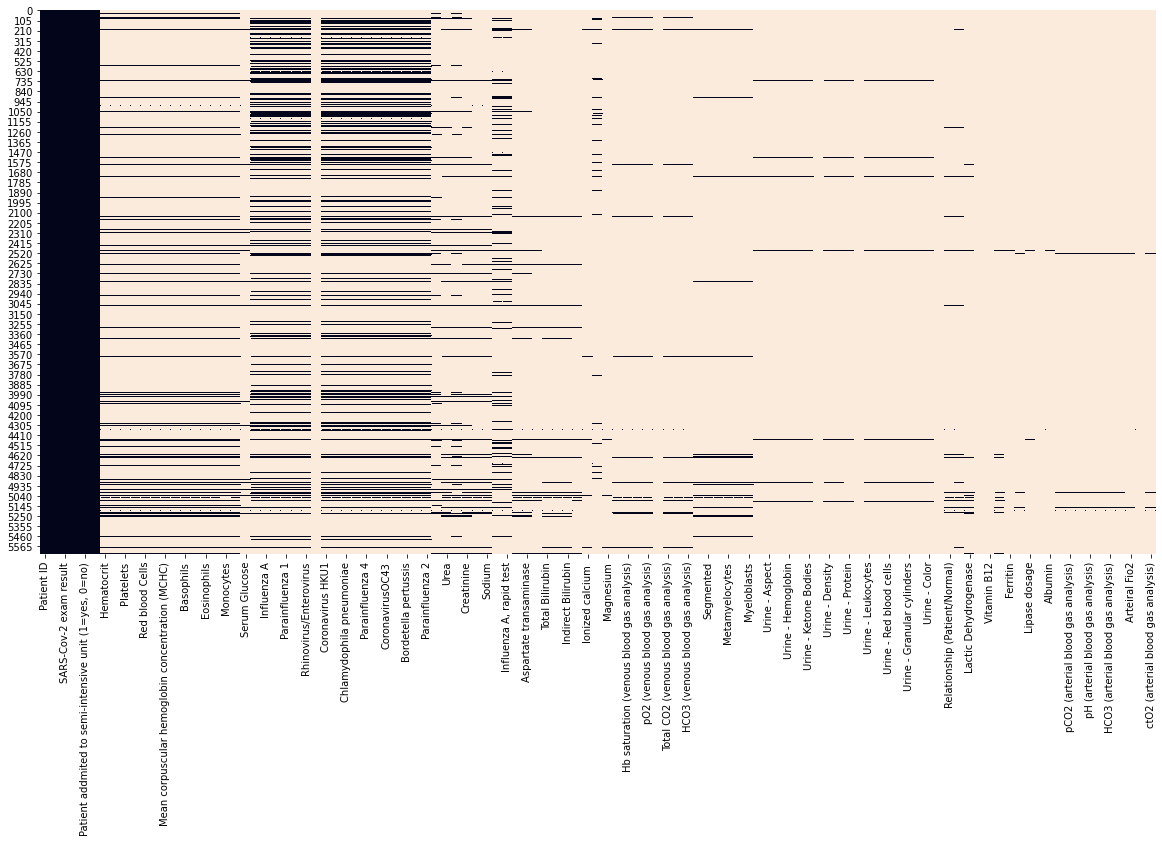

In [5]:
df.isna() # valeurs manquantes = TRUE

plt.figure(figsize=(20,10))
sns.heatmap(df.isna() , cbar=False) # toutes les veleurs manquantes sont de couleur blanche et existantes de couleur noire

In [6]:
df.isna().sum() # somme des valeurs manquantes dans toutes nos colonnes

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [7]:
df.isna().sum() / df.shape[0] # le % de valeurs manquantes par colonne

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [8]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=True) # trier par ordre croissant

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Analyse de fond

### 1. Visualisation initiale - Elimination des valeurs manquantes

In [9]:
df = df[df.columns[(df.isna().sum() / df.shape[0]) < 0.9]] # selectionne les colonnes ou na < 0.9 et ajoute les dans le dataset df

In [10]:
df.shape

(5644, 39)

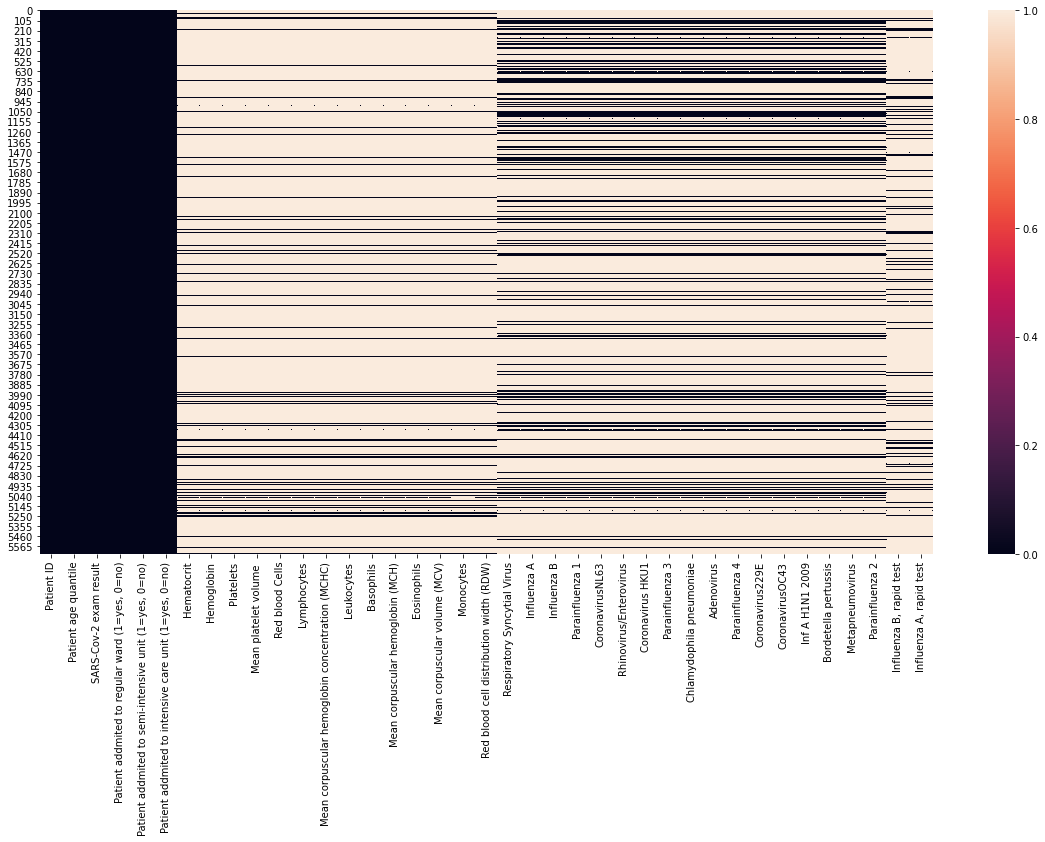

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [12]:
df = df.drop('Patient ID', axis=1)
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

### Visualisation de la target : SARS-Cov-2 exam result

In [13]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True) # Compter le nombre de valeurs positives et négatives ''' normalize = True pour afficher en pourcentage'

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Histogramme des valeurs continues

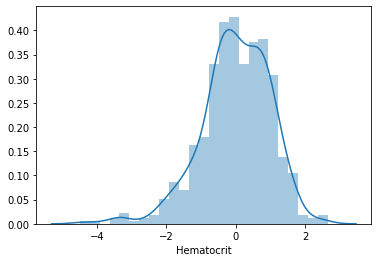

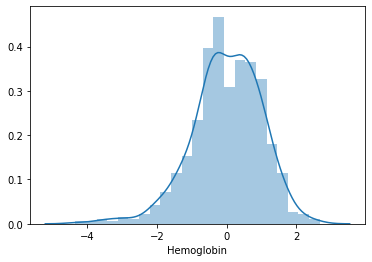

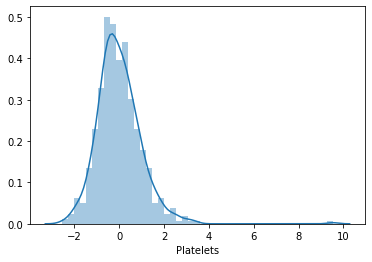

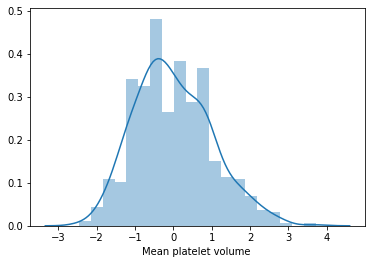

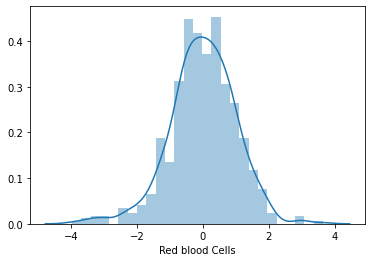

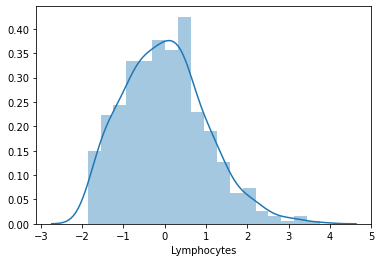

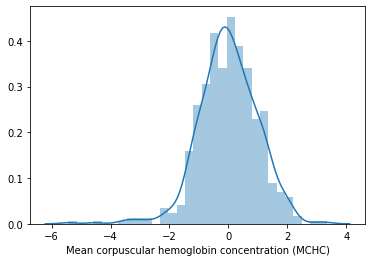

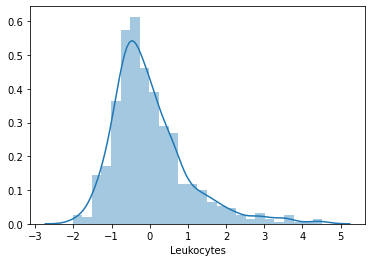

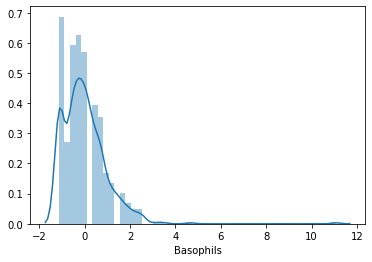

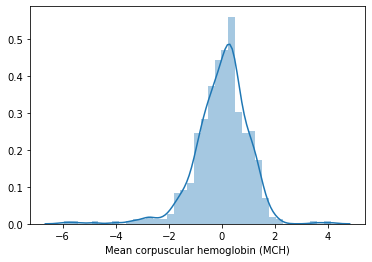

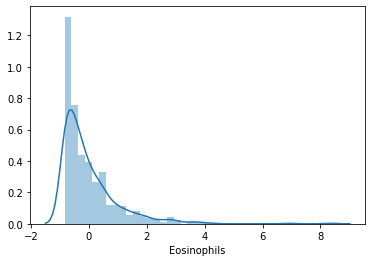

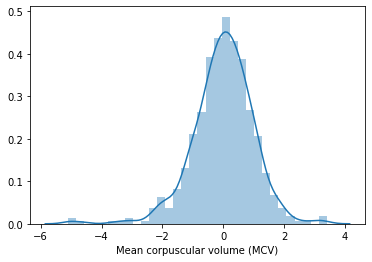

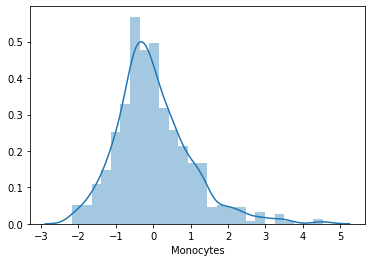

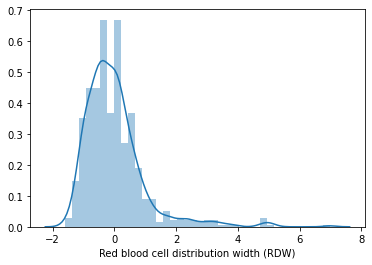

In [14]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col].dropna()) # pour observer la distribution des variables


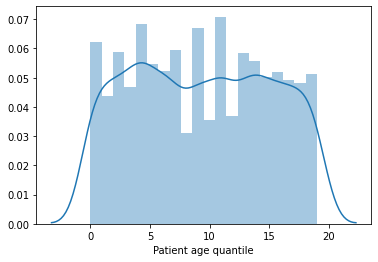

In [15]:
sns.distplot(df['Patient age quantile'] , bins=20) # observer la distribution de la variable Age

## Variables qualitatives ou discretes





In [16]:
for col in df.select_dtypes('object'):
    print( f'{col:-<60} {df[col].unique()}') # colonne : , catégorie '''la méthode unique pour voir les catégories'''
   # print(df[col].value_counts(normalize=True))""

SARS-Cov-2 exam result-------------------------------------- ['negative' 'positive']
Respiratory Syncytial Virus--------------------------------- [nan 'not_detected' 'detected']
Influenza A------------------------------------------------- [nan 'not_detected' 'detected']
Influenza B------------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1--------------------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63--------------------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus-------------------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1-------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3--------------------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------------------------------------ [nan 'not_detected' 'detected']
Adenovirus-------------------------------------------------- [nan 'not_detecte

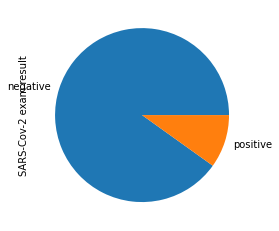

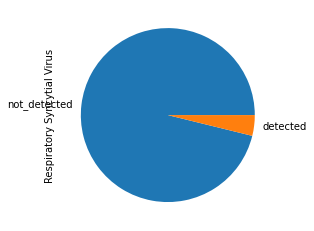

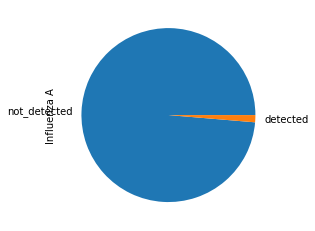

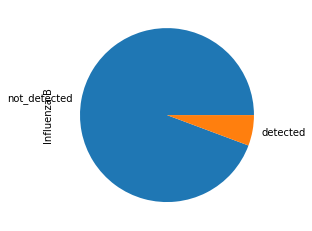

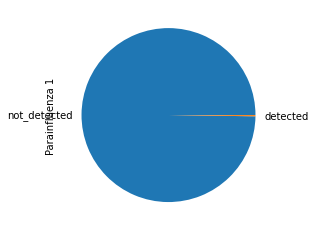

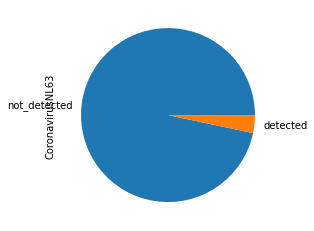

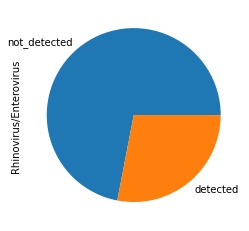

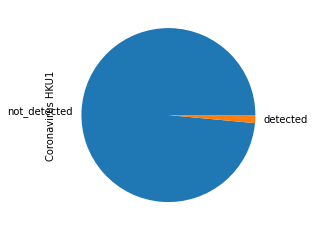

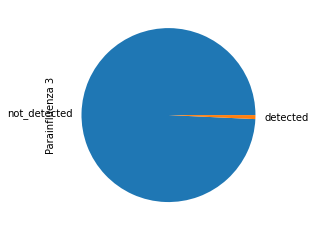

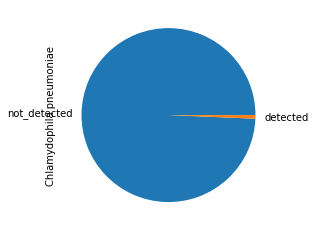

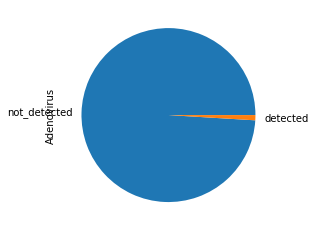

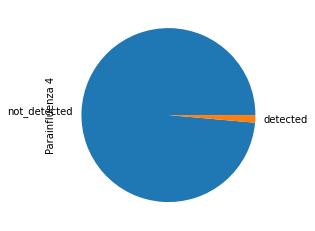

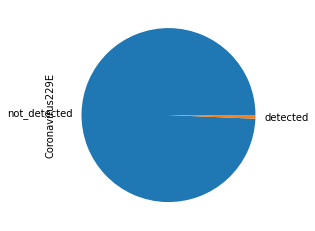

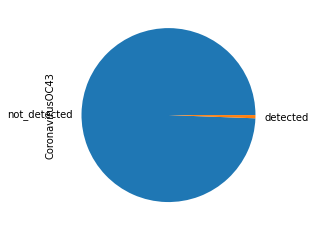

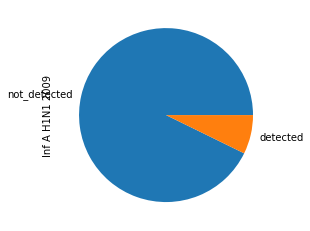

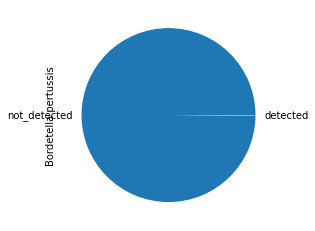

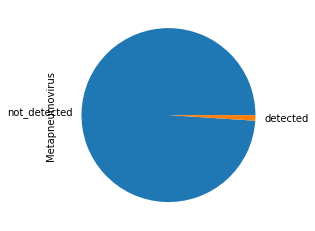

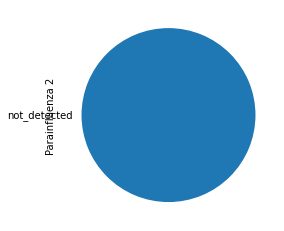

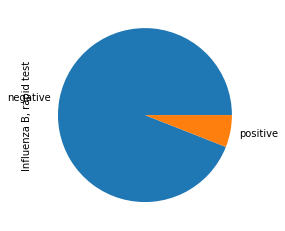

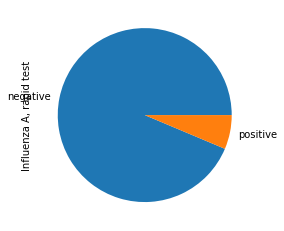

In [17]:
for col in df.select_dtypes('object'): 
    plt.figure()
    df[col].value_counts().plot.pie() #on utilise value_counts également pour les catégories ''' value_counts liste et donne le total de chaque catégorie , unique donne uniquement les catégories'''

### Relation Target/Variables

### Creation de sous ensembles positifs et negatifs

In [18]:
positive_df = df[df['SARS-Cov-2 exam result'] == "positive"] #boolean indexing
negative_df = df[df['SARS-Cov-2 exam result'] == "negative"]

### Creation des ensembles blood et viral

In [19]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate > 0.88) & (missing_rate < 0.9)]
viral_columns = df.columns[(missing_rate > 0.75) & (missing_rate <0.88)]
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

### Target / Blood

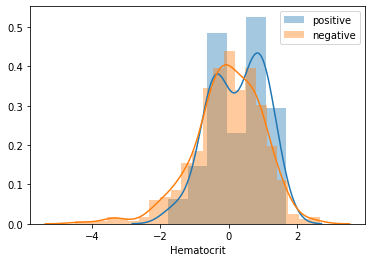

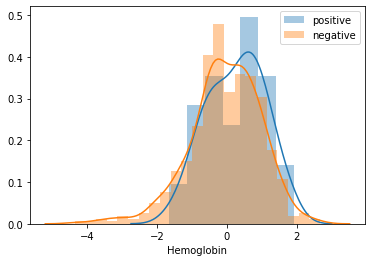

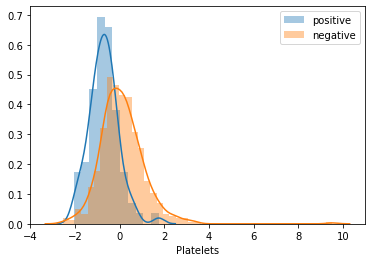

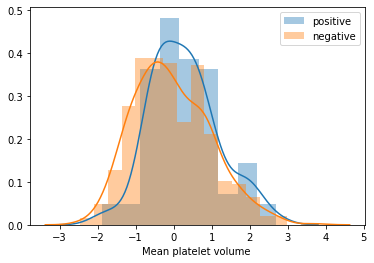

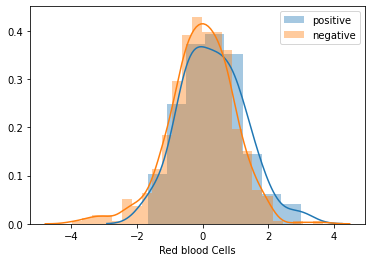

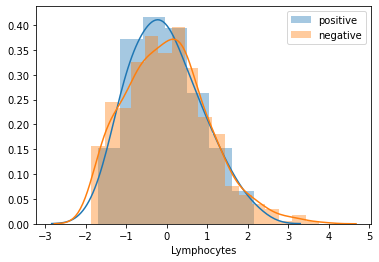

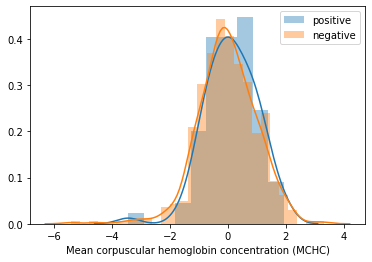

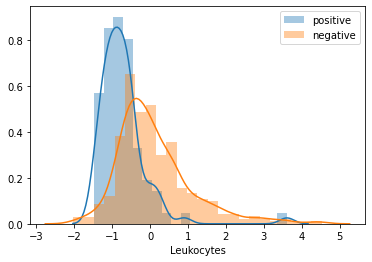

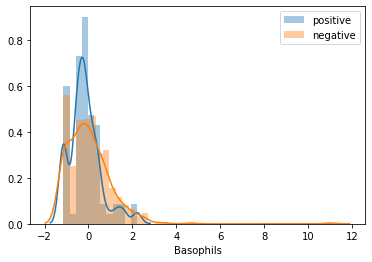

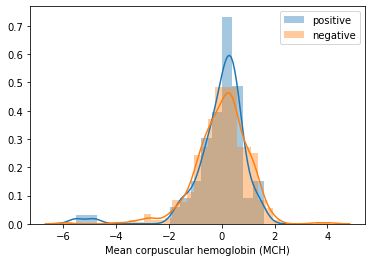

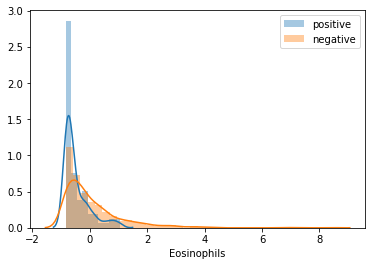

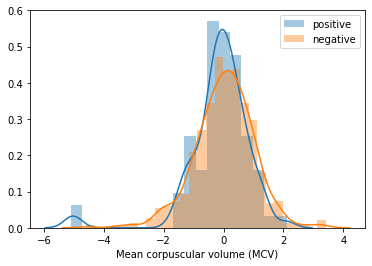

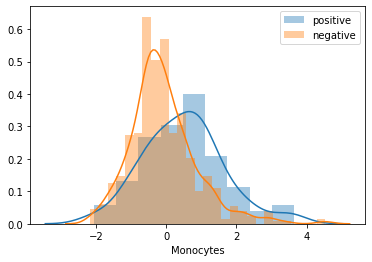

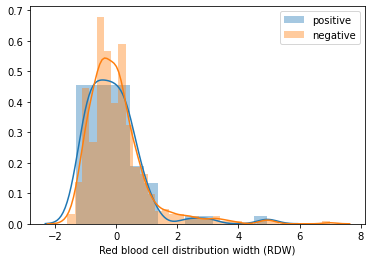

In [20]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col].dropna() , label = "positive")
    sns.distplot(negative_df[col].dropna() , label = "negative")
    plt.legend()

### Target / Age

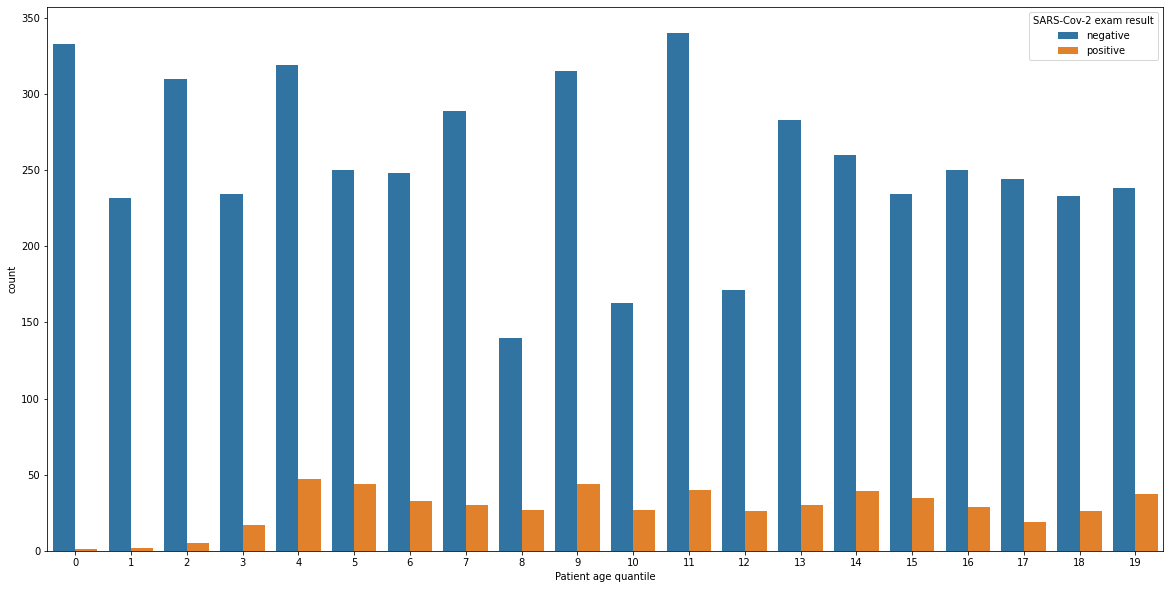

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x="Patient age quantile" , hue="SARS-Cov-2 exam result" , data=df)

### Target / viral ( il s'agit de deux variables qualitatives) 

'''On utilise crosstab de pandas pour examiner la relation entre 2 variables qualitatives '''

In [22]:
pd.crosstab(df['SARS-Cov-2 exam result'] , df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

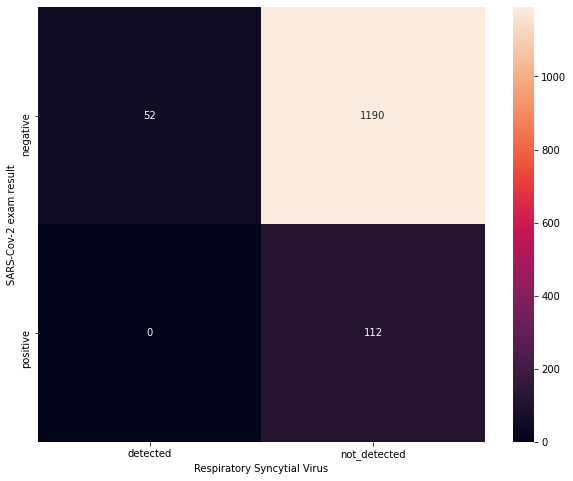

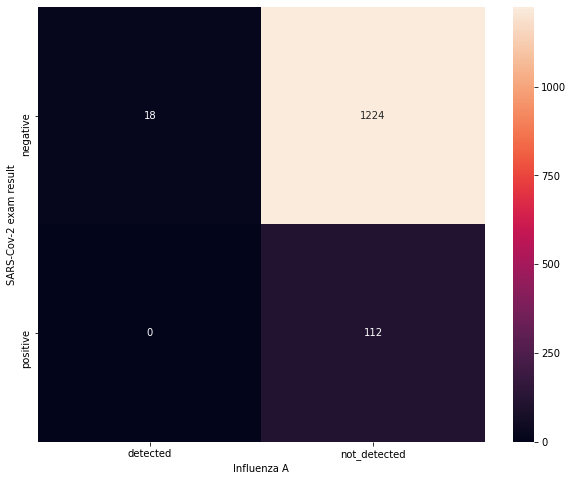

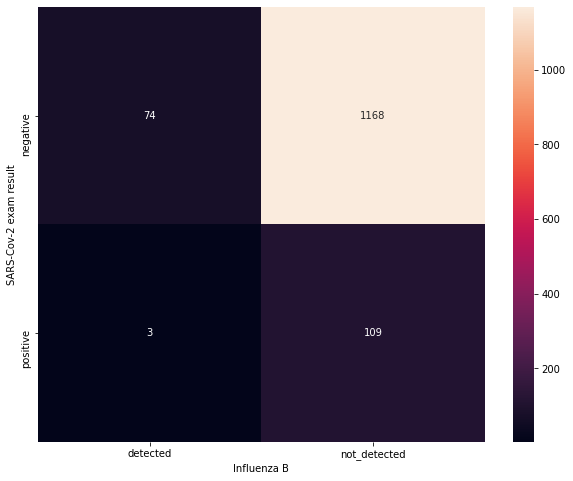

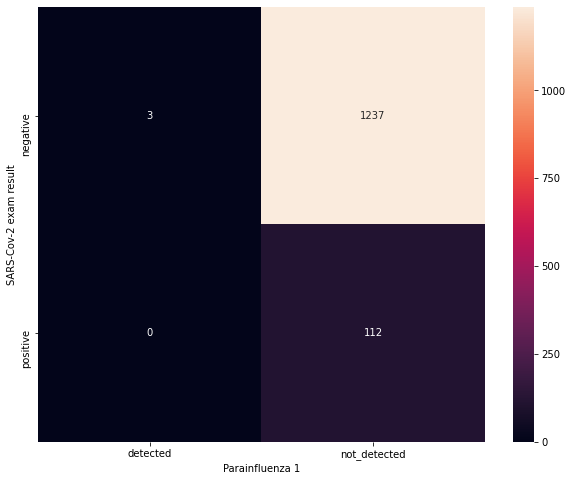

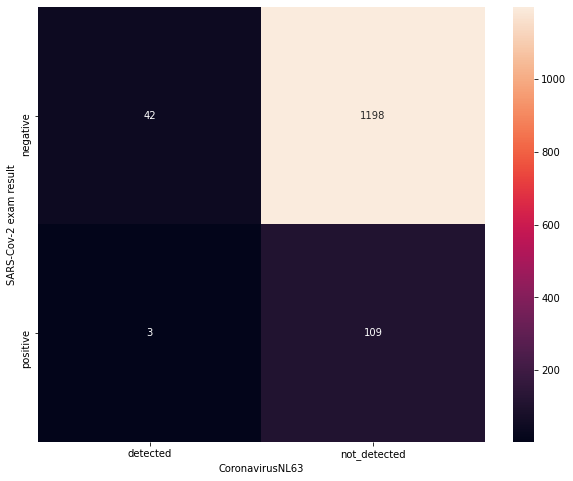

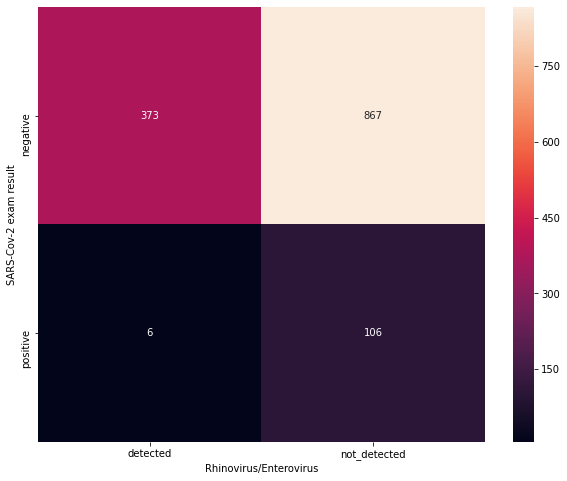

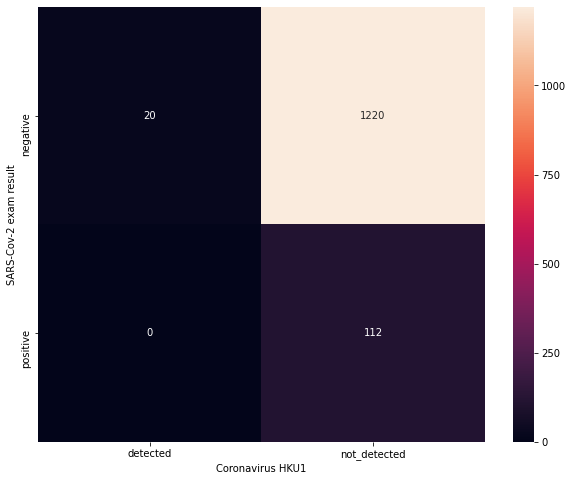

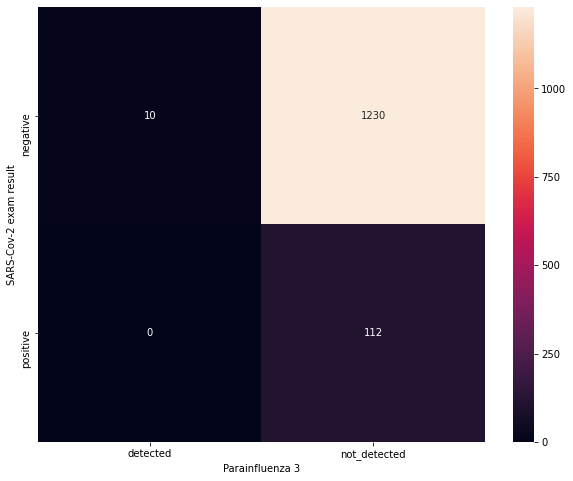

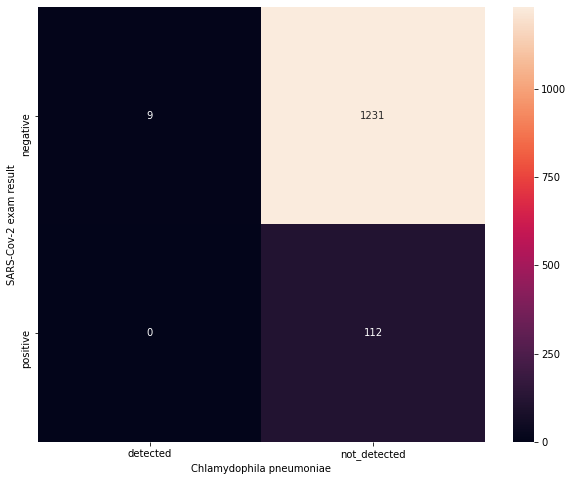

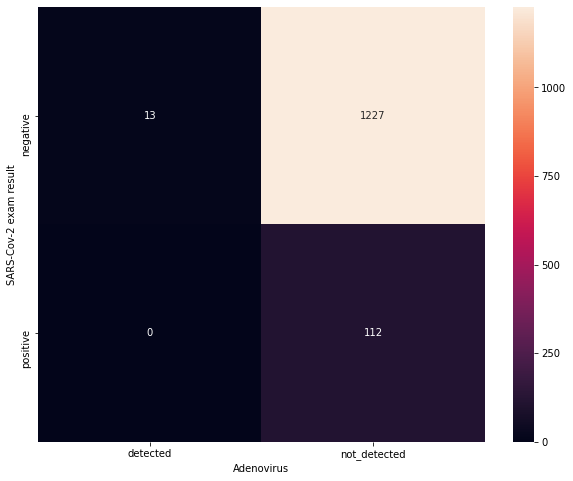

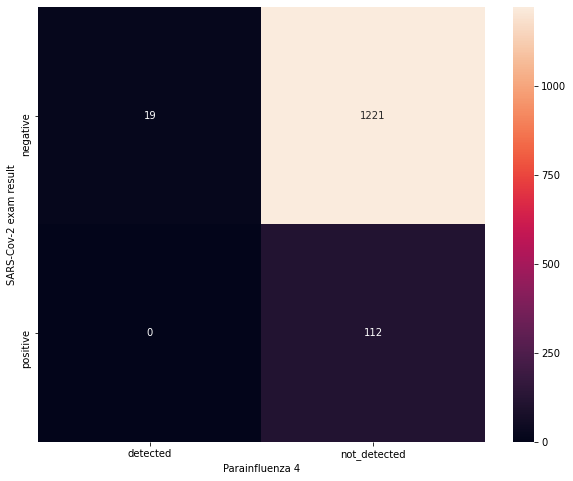

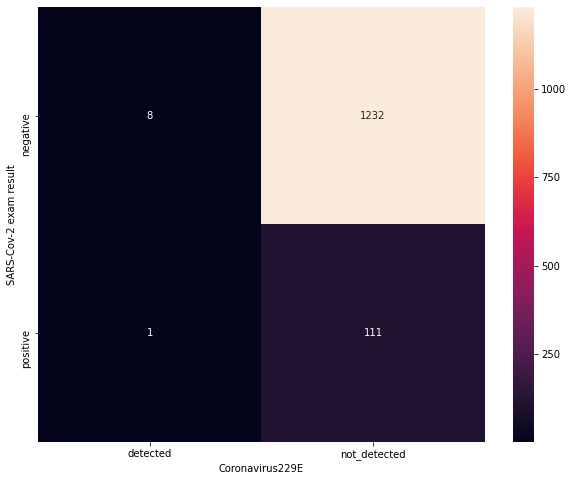

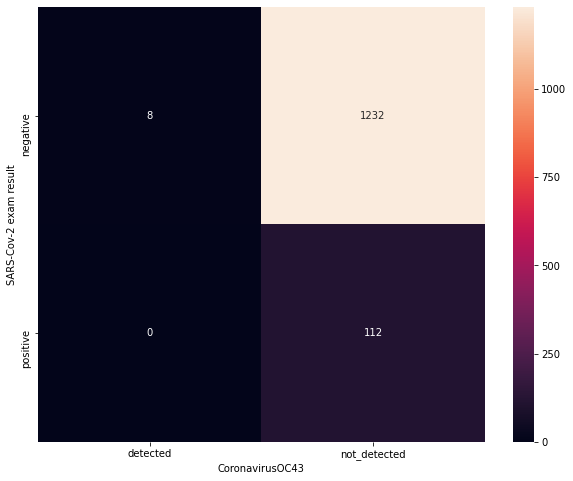

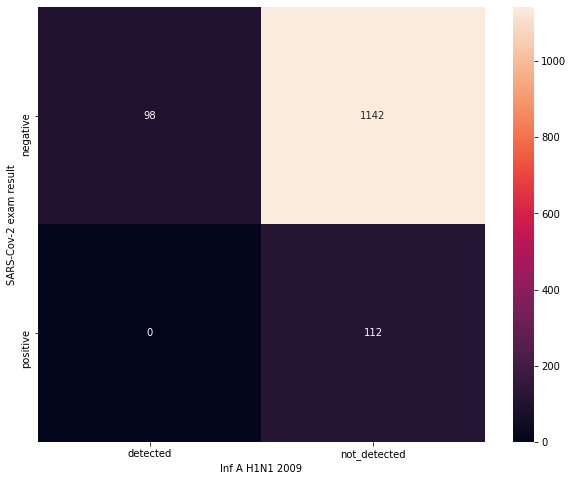

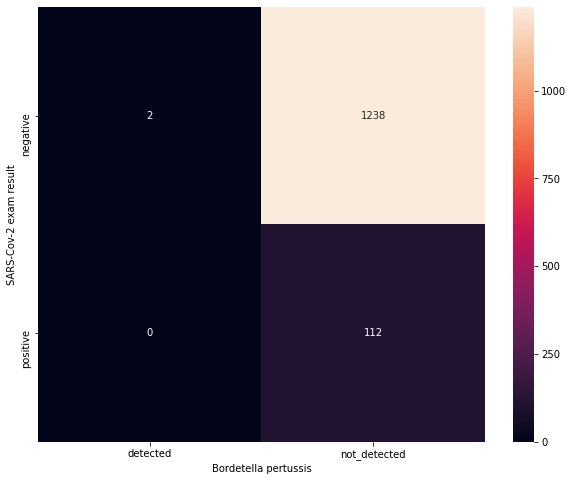

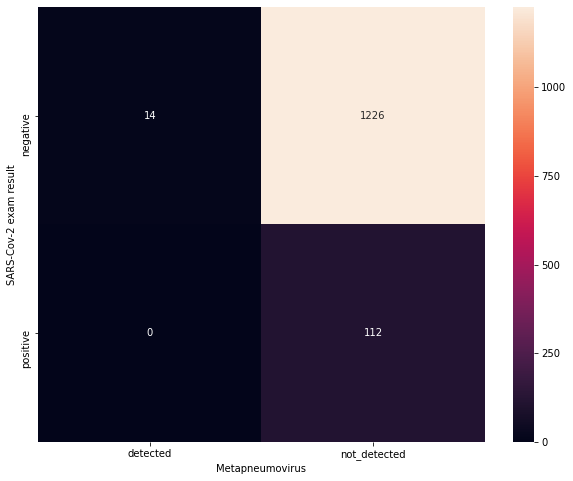

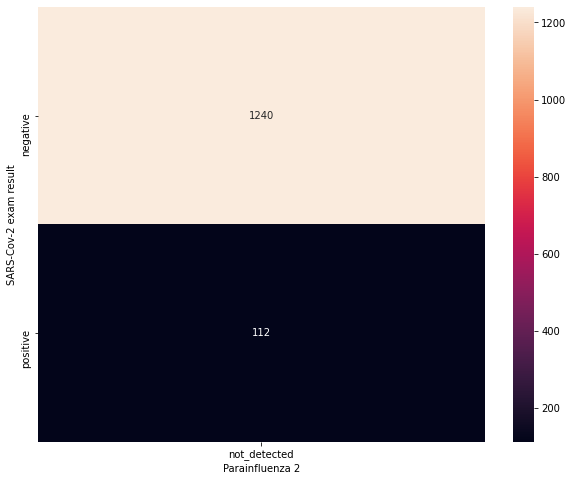

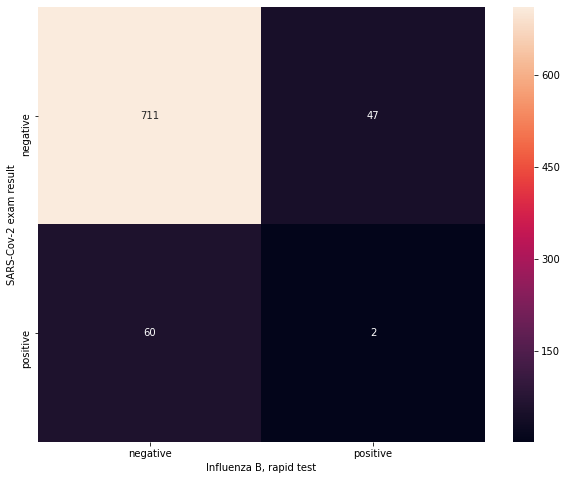

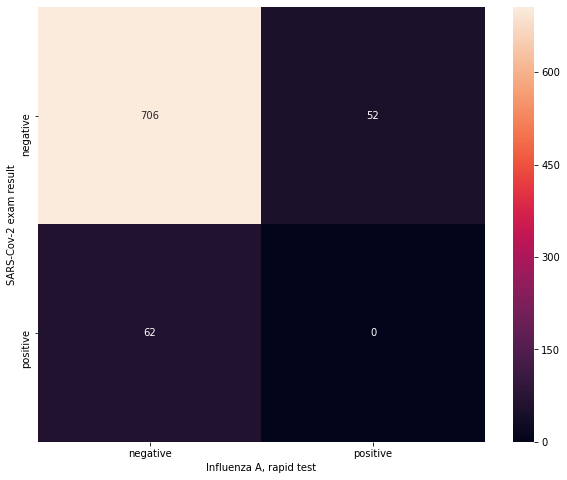

In [23]:
for col in viral_columns:
    plt.figure(figsize=(10,8))
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]) , annot=True , fmt='d')

## Analyse avancée


## Relations variables / variables

### Relations taux sanguins

'''Pour mieux utiliser pairplot de seaborn , il faut au préalable bien filtrer les données et non l'utiliser dès le début '''

<Figure size 720x720 with 0 Axes>

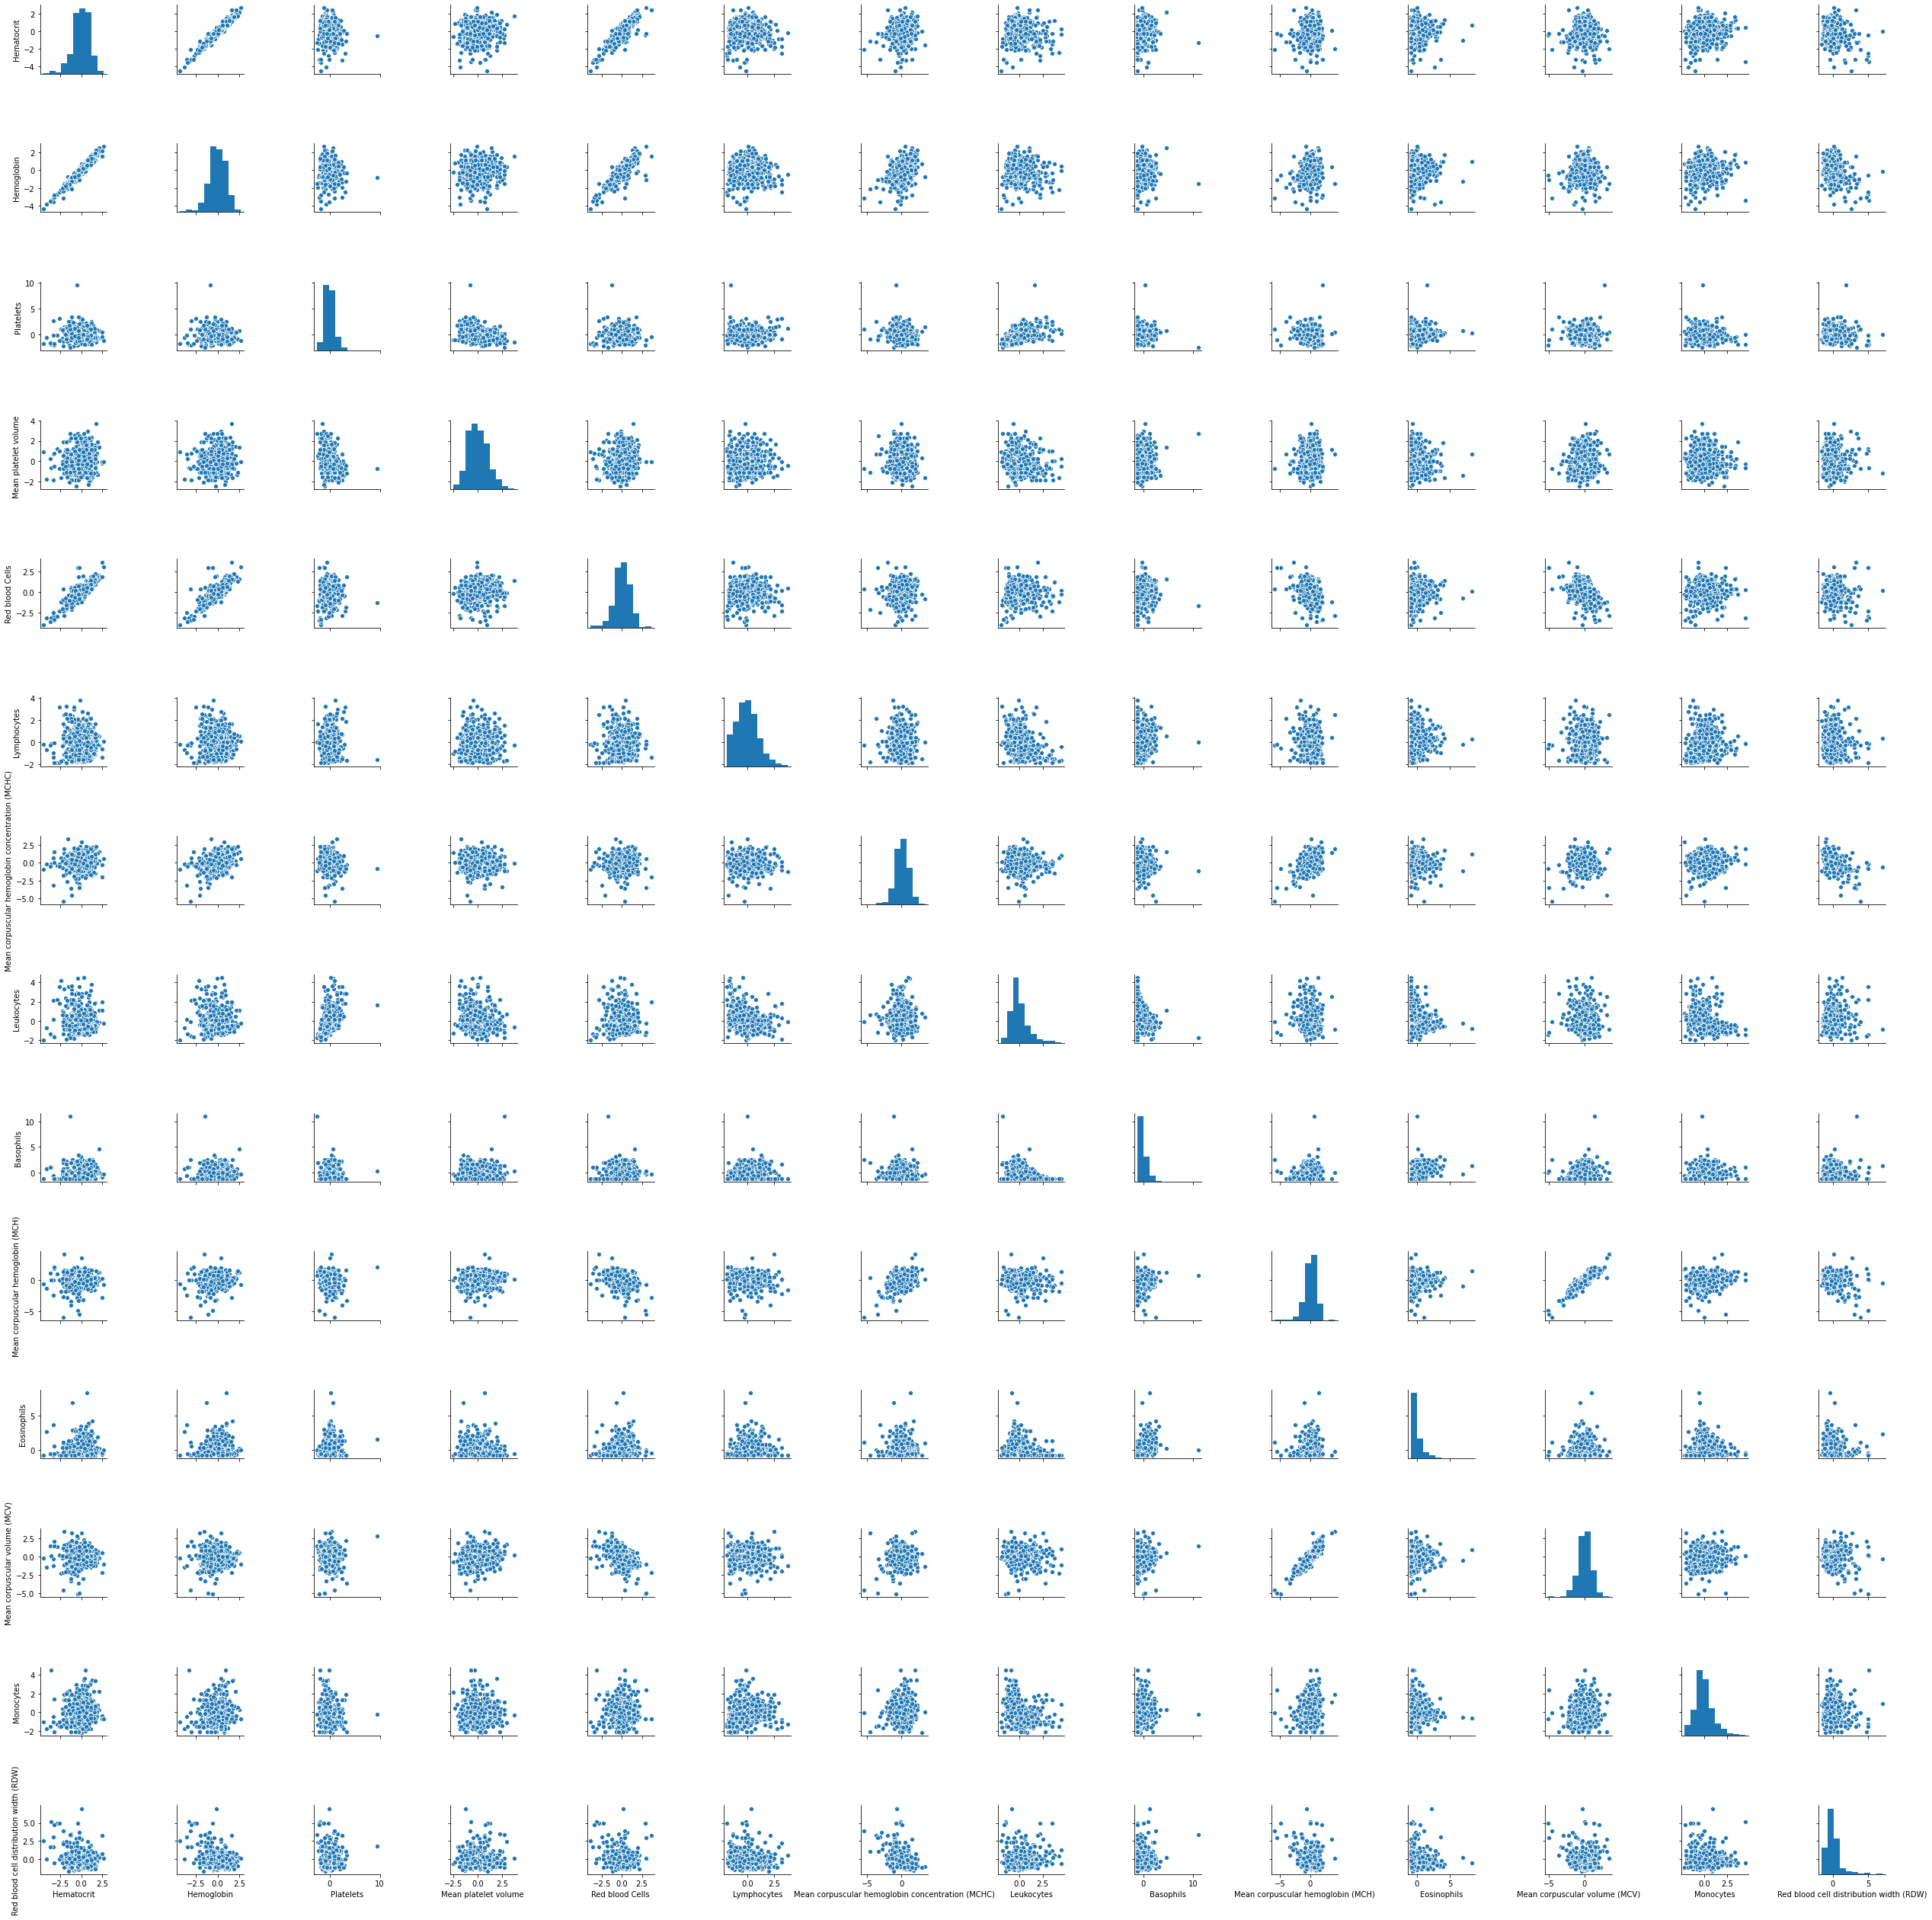

In [33]:
plt.figure(figsize=(10,10))
sns.pairplot(df[blood_columns])

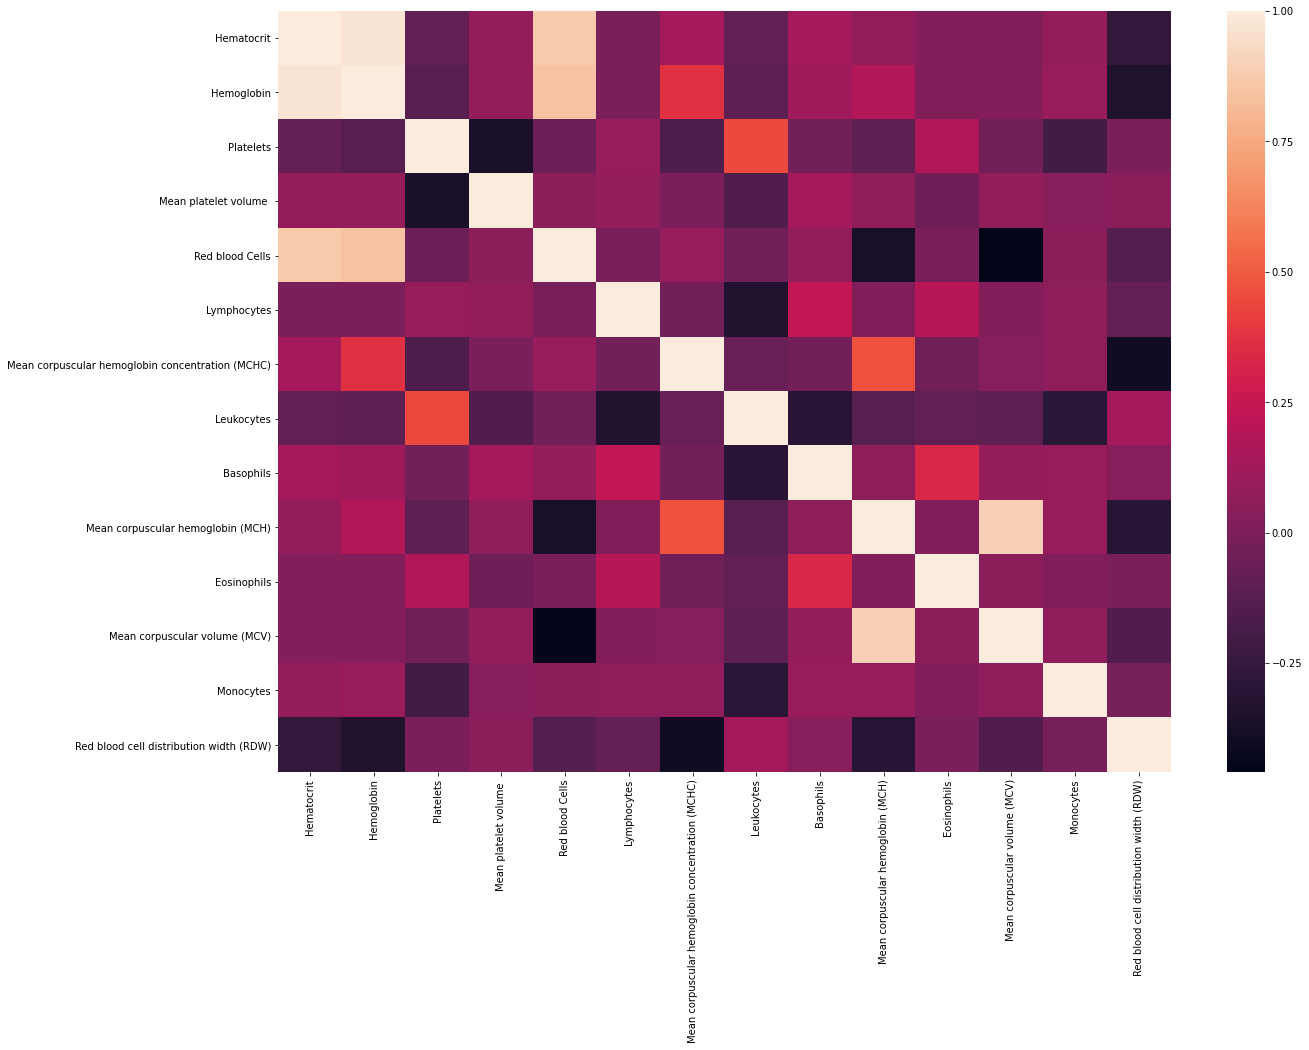

In [42]:
plt.figure(figsize=(20,14))
sns.heatmap(df[blood_columns].corr()) # observer la correlation entre les variables

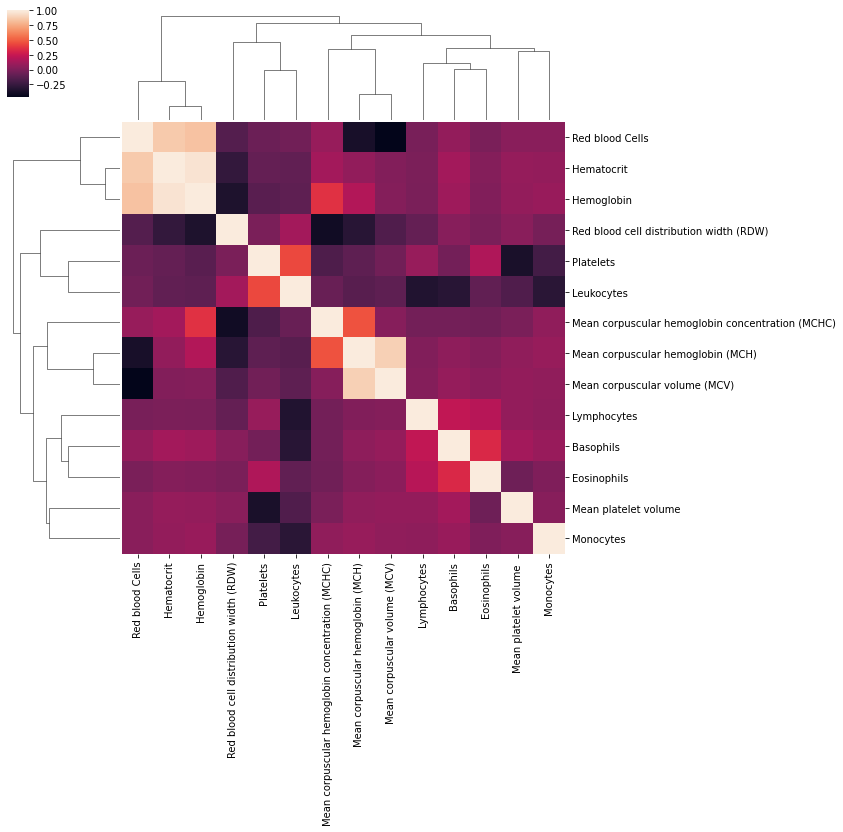

In [44]:
sns.clustermap(df[blood_columns].corr()) # regroupe les variables en cluster 

### Relation blood_data / age

/Users/Mohsylla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/Mohsylla/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/Mohsylla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly cl

<Figure size 1440x720 with 0 Axes>

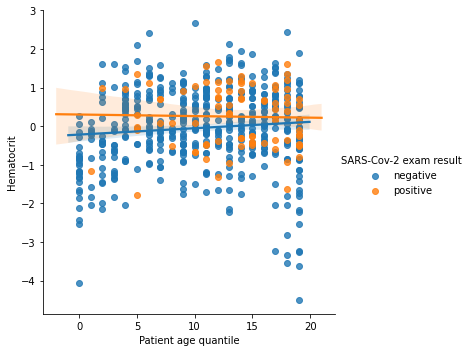

<Figure size 1440x720 with 0 Axes>

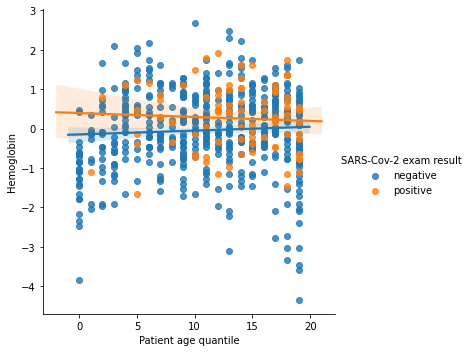

<Figure size 1440x720 with 0 Axes>

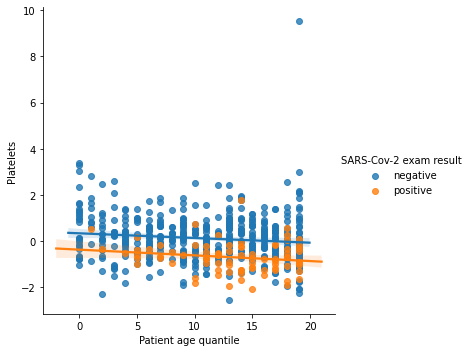

<Figure size 1440x720 with 0 Axes>

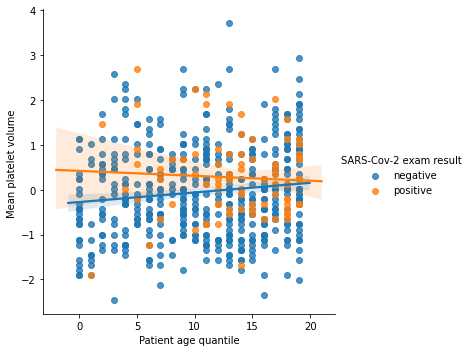

<Figure size 1440x720 with 0 Axes>

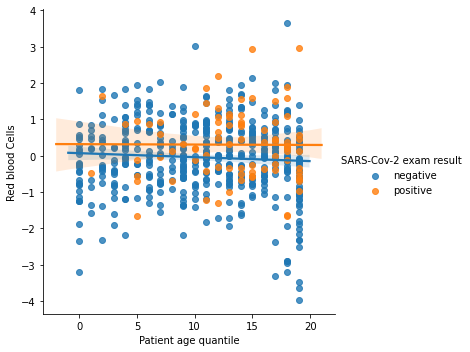

<Figure size 1440x720 with 0 Axes>

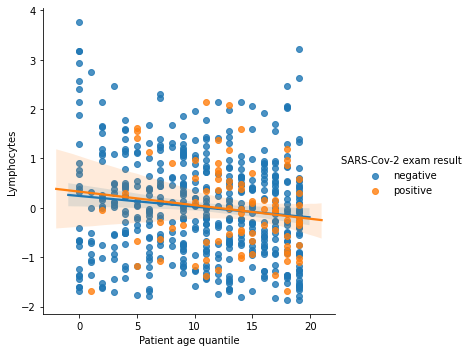

<Figure size 1440x720 with 0 Axes>

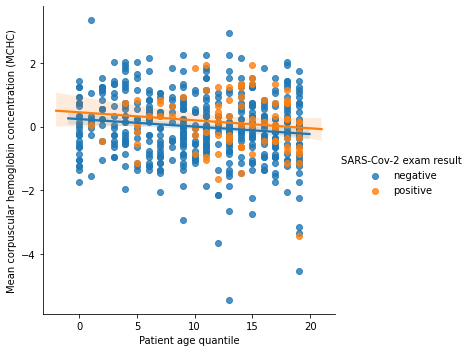

<Figure size 1440x720 with 0 Axes>

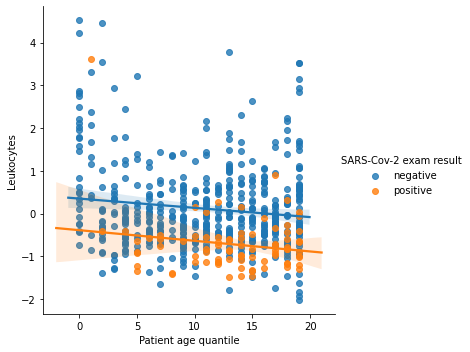

<Figure size 1440x720 with 0 Axes>

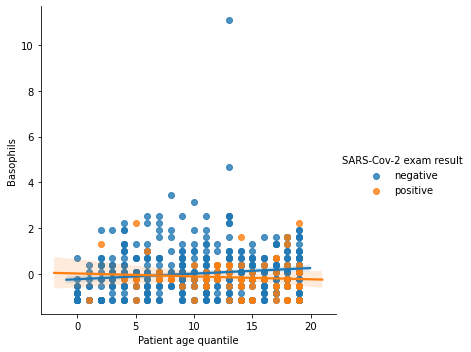

<Figure size 1440x720 with 0 Axes>

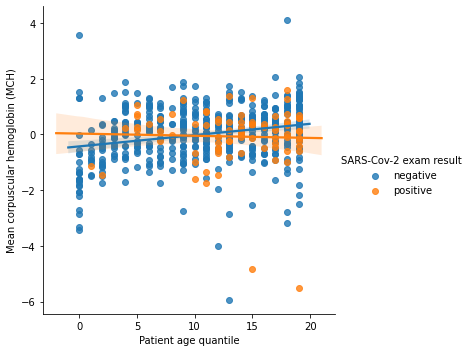

<Figure size 1440x720 with 0 Axes>

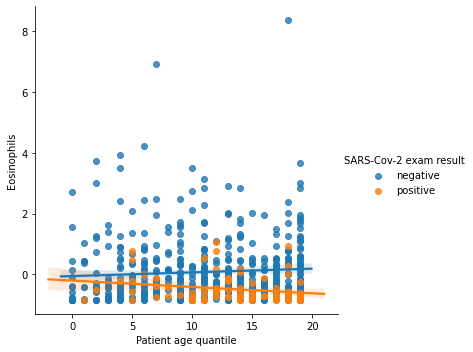

<Figure size 1440x720 with 0 Axes>

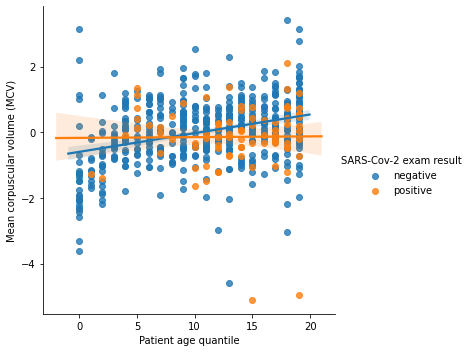

<Figure size 1440x720 with 0 Axes>

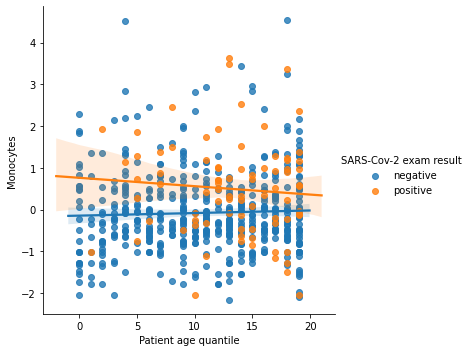

<Figure size 1440x720 with 0 Axes>

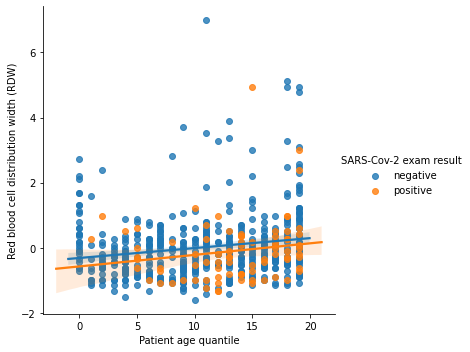

In [46]:
for col in blood_columns:
    plt.figure(figsize = (20,10))
    sns.lmplot(x='Patient age quantile' , y=col , hue="SARS-Cov-2 exam result" , data = df)

In [55]:
df.corr()['Patient age quantile'].sort_values() # corr ne s'exécute que sur les variables quantitatives donc dans notre cas sur les tests sanguins
#la correlation entre la variable Patient age quantile et les autres variables quantitatives

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Relation Influenza A et B / rapid test 

In [57]:
pd.crosstab(df['Influenza A'] , df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [59]:
pd.crosstab(df['Influenza B'] , df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### Relation Viral / Sanguin

''' Creation d'une variable "est malade" qui va nous dire si un patient à n'importe laquelle des maladies listées '''

In [62]:
df[viral_columns[:-2]] == "detected" # tableau privé des deux dernières variables

Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                            NaN           NaN           NaN             NaN   
1                   not_detected  not_detected  not_detected    not_detected   
2                            NaN           NaN           NaN             NaN   
3                            NaN           NaN           NaN             NaN   
4                   not_detected  not_detected  not_detected    not_detected   
...                          ...           ...           ...             ...   
5639                         NaN           NaN           NaN             NaN   
5640                         NaN           NaN           NaN             NaN   
5641                         NaN           NaN           NaN             NaN   
5642                         NaN           NaN           NaN             NaN   
5643                         NaN           NaN           NaN             NaN   

     CoronavirusNL63 Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                NaN                    NaN              NaN             NaN   
1       not_detected               detected     not_detected    not_detected   
2                NaN                    NaN              NaN             NaN   
3                NaN                    NaN              NaN             NaN   
4       not_detected               detected     not_detected    not_detected   
...              ...                    ...              ...             ...   
5639             NaN                    NaN              NaN             NaN   
5640             NaN                    NaN              NaN             NaN   
5641             NaN                    NaN              NaN             NaN   
5642             NaN                    NaN              NaN             NaN   
5643             NaN                    NaN              NaN             NaN   

     Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                         NaN           NaN             NaN             NaN   
1                not_detected  not_detected    not_detected    not_detected   
2                         NaN           NaN             NaN             NaN   
3                         NaN           NaN             NaN             NaN   
4                not_detected  not_detected    not_detected    not_detected   
...                       ...           ...             ...             ...   
5639                      NaN           NaN             NaN             NaN   
5640                      NaN           NaN             NaN             NaN   
5641                      NaN           NaN             NaN             NaN   
5642                      NaN           NaN             NaN             NaN   
5643                      NaN           NaN             NaN             NaN   

     CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0                NaN             NaN                  NaN             NaN   
1       not_detected    not_detected         not_detected    not_detected   
2                NaN             NaN                  NaN             NaN   
3                NaN             NaN                  NaN             NaN   
4       not_detected    not_detected         not_detected    not_detected   
...              ...             ...                  ...             ...   
5639             NaN             NaN                  NaN             NaN   
5640             NaN             NaN                  NaN             NaN   
5641             NaN             NaN                  NaN             NaN   
5642             NaN             NaN                  NaN             NaN   
5643             NaN             NaN                  NaN             NaN   

     Parainfluenza 2  
0                NaN  
1       not_detected  
2                NaN  
3                NaN  
4       not_detected  
...              ...  
5639             NaN  
5640             NaN  
56

In [77]:
df["Est malade"] = np.sum(df[viral_columns[:-2]] == "detected" , axis=1) >=1 # fais la somme des lignes du dataset et les affiche dans la colonne 'est malade'

In [80]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [84]:
malade_df = df[df['Est malade'] == True]
non_malade_df = df[df['Est malade'] == False]

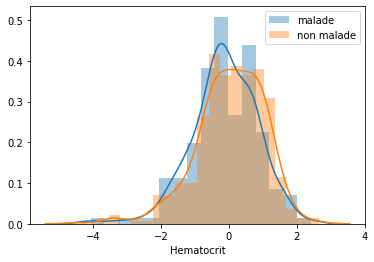

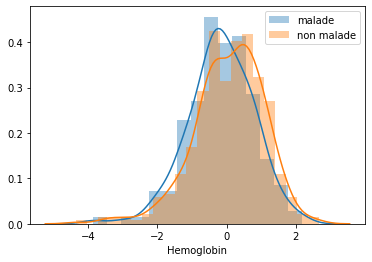

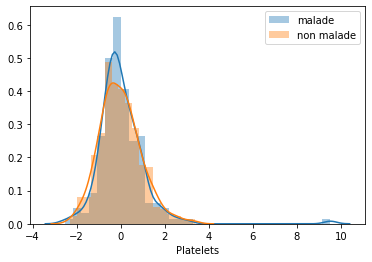

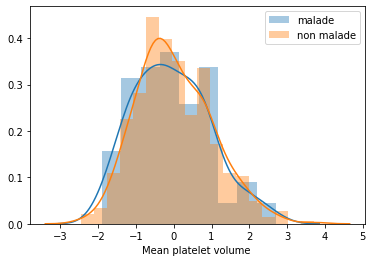

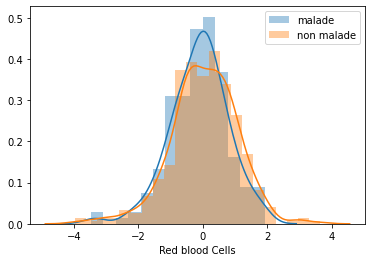

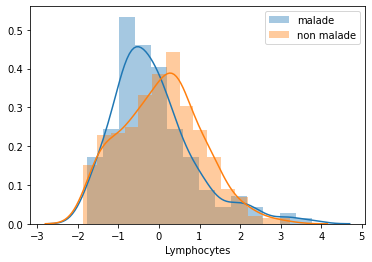

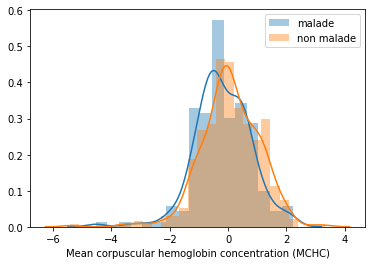

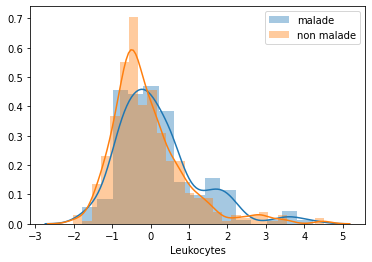

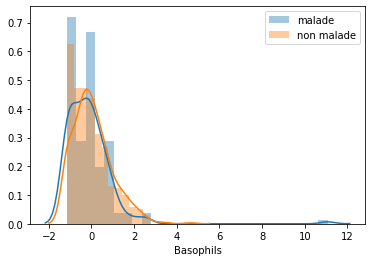

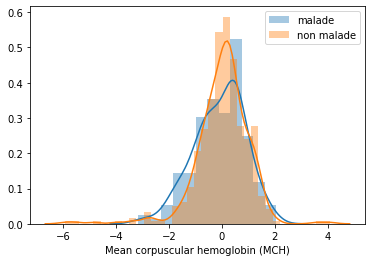

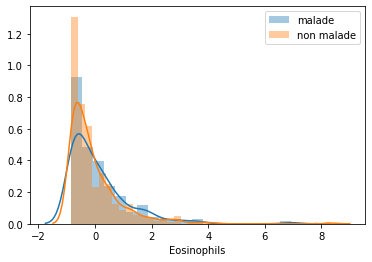

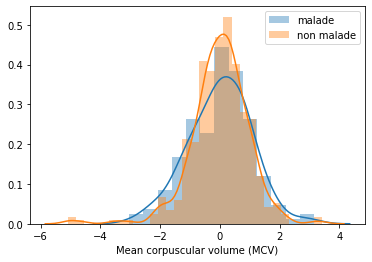

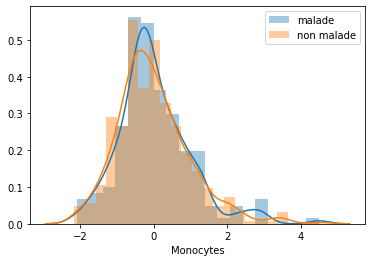

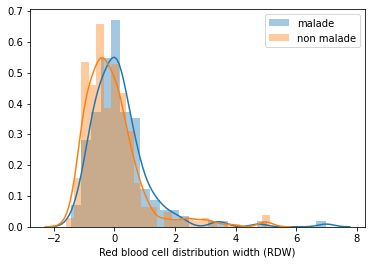

In [86]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col].dropna() , label = "malade")
    sns.distplot(non_malade_df[col].dropna() , label = "non malade")
    plt.legend()

### Relation hospitalisation / est malade

In [89]:
def hospitalisation(df):
    if df["Patient addmited to regular ward (1=yes, 0=no)"] == 1 :
        return 'surveillance'
    elif df["Patient addmited to semi-intensive unit (1=yes, 0=no)"] == 1 : 
        return 'soins semi-intensifs'
    elif df["Patient addmited to intensive care unit (1=yes, 0=no)"] == 1 :
        return 'soins intensifs'
    else :
        return 'inconnu'

In [92]:
df['Statut'] = df.apply(hospitalisation , axis=1) # appliquer la fonction hospital a la colonne statut de notre dataframe

In [94]:
df['Statut'].value_counts()

inconnu                 5474
surveillance              79
soins semi-intensifs      50
soins intensifs           41
Name: Statut, dtype: int64

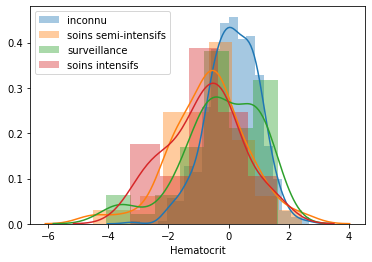

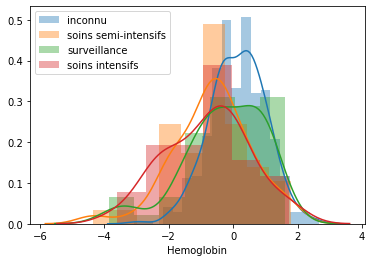

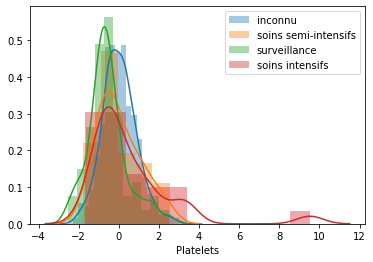

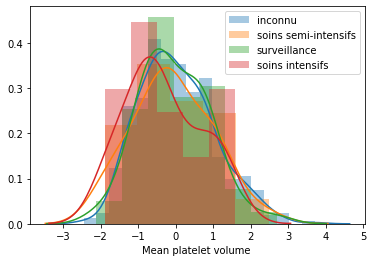

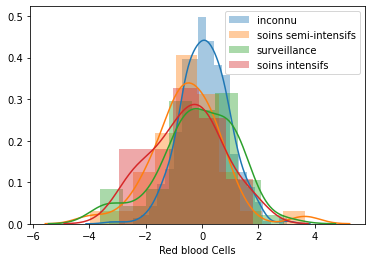

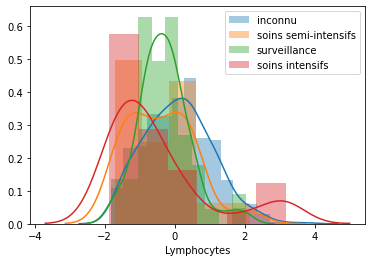

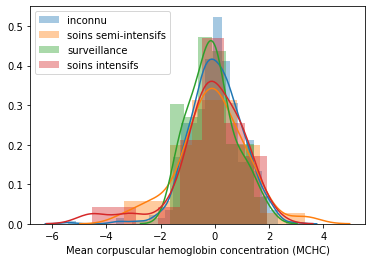

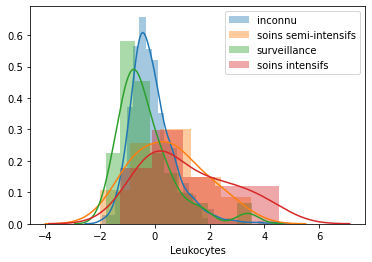

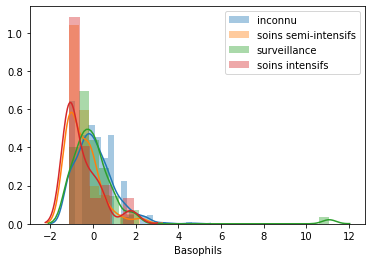

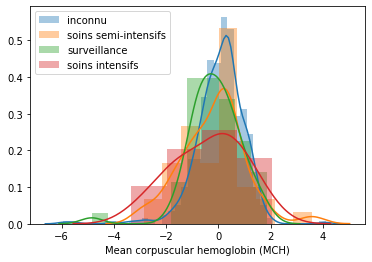

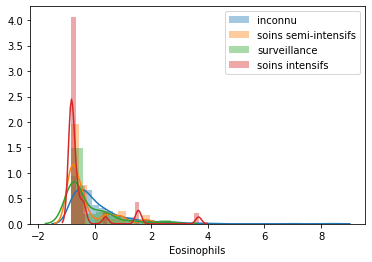

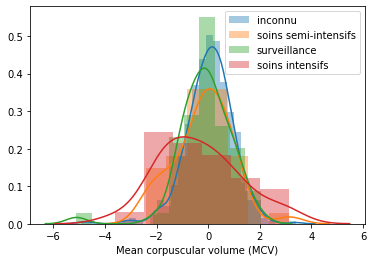

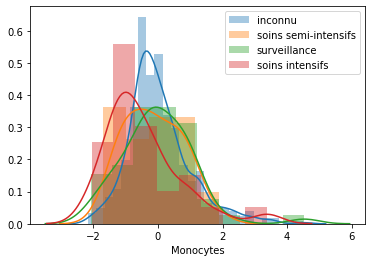

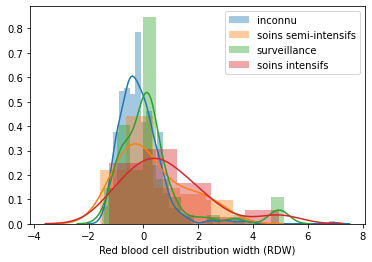

In [96]:
for col in blood_columns:
    plt.figure()
    for cat in df['Statut'].unique():
        sns.distplot(df[df['Statut'] == cat][col].dropna() , label = cat)
    plt.legend()
        

### Analyse des valeurs manquantes

In [121]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [122]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [123]:
df[blood_columns].count() # nombre de valeurs

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [124]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [106]:
# on ne peut pas choisir viral_columns au détriment de blood_columns a cause de l'importance de blood qu'on a aperçu dans les analyses

In [178]:
### Connaitre l'état de notre target , si on élimine toutes les valeurs manquantes
df1 = df[viral_columns[:-2]]
df1['Covid'] = df["SARS-Cov-2 exam result"]
df1.dropna()['Covid'].value_counts(normalize=True)

/Users/Mohsylla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


negative    0.91716
positive    0.08284
Name: Covid, dtype: float64

In [131]:
df2 = df[blood_columns]
df2['Covid'] = df["SARS-Cov-2 exam result"]
df2.dropna()['Covid'].value_counts(normalize=True) # applique dropna sur le dataset avant d'ajouter la nouvelle colonne

/Users/Mohsylla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.864548
positive    0.135452
Name: Covid, dtype: float64

In [ ]:
## T-Test

'''Il faut que la balance de valeurs positives soit equivalente environ à celle des valeurs négatives pour reussir ce test'''

In [144]:
from scipy.stats import ttest_ind

In [136]:
positive_df.shape 

(558, 38)

In [175]:
#on preleve un echantillon equivalent au nombre de valeurs positives dans le dataframe négative_df pour ajuster le test
balanced_neg = negative_df.sample(positive_df.shape[0])
balanced_neg.shape

(558, 38)

In [142]:
balanced_neg['SARS-Cov-2 exam result'].value_counts()

negative    558
Name: SARS-Cov-2 exam result, dtype: int64

In [171]:
def t_test(col):
    alpha = 0.02
    stat,p = ttest_ind(balanced_neg[col].dropna(),positive_df[col].dropna())
    if p < alpha:
        return 'H0 rejettée'
    else:
        return 0


In [172]:
for col in blood_columns:
    print( f'{col:-<50} {t_test(col)}')
    

Hematocrit---------------------------------------- H0 rejettée
Hemoglobin---------------------------------------- H0 rejettée
Platelets----------------------------------------- H0 rejettée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 rejettée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejettée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejettée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejettée
Red blood cell distribution width (RDW)----------- 0


# Pre-processing

In [329]:
dfp = data.copy() # creer une copie du dataset original

In [330]:
missing_rate = dfp.isna().sum() / dfp.shape[0] # valeurs manquantes
blood_col = list(dfp.columns[(missing_rate > 0.88) & (missing_rate < 0.9)]) # convertir en liste l'ensemble des blood columns
viral_col = list(dfp.columns[(missing_rate > 0.75) & (missing_rate <0.88)])

In [331]:
key_col = ["Patient age quantile","SARS-Cov-2 exam result"]

In [332]:
dfp = dfp[key_col + blood_col + viral_col]

In [333]:
 # nouveau dataset
dfp.head()
#dfp['SARS-Cov-2 exam result'].value_counts()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

In [334]:
dfp.shape

(5644, 35)

## Train test - nettoyage - encodage

### Train test

''' diviser le dataset en 2 parties , une pour lentrainement et l'autre pour le test'''

In [335]:
from sklearn.model_selection import train_test_split

trainset , testset = train_test_split(dfp , test_size=0.2 , random_state=0)

In [336]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [337]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Encodage

''' Transformer les valeurs discretes en valeurs continues '''

In [338]:
code = {'positive':1,
       'negative':0,
       'detected':1,
       'not_detected':0}
# ensuite on va utiliser la fonction map pour appliquer ce dictionnaire à toutes les colonnes de type object

for col in dfp.select_dtypes('object'):
    dfp[col] = dfp[col].map(code)


In [339]:
dfp.dtypes.value_counts() # plus de variables object

float64    33
int64       2
dtype: int64

In [383]:
# on met tout ça dans une fontion pour faciliter le travail 
def encodage(dfp):
    code = {'positive':1,
       'negative':0,
       'detected':1,
       'not_detected':0}
    for col in dfp.select_dtypes('object'):
        dfp[col] = dfp[col].map(code)
    
    return dfp

In [384]:
def imputation(dfp): # fonction pour supprimer les valeurs manquantes
  #  return dfp.dropna(axis=0) # 1
  #   return dfp.fillna(-999) #2
    
    

In [385]:
def preprocessing(dfp):
    dfp = encodage(dfp)
    dfp = imputation(dfp)
    
    X = dfp.drop('SARS-Cov-2 exam result' , axis=1) # feature
    y = dfp['SARS-Cov-2 exam result'] #target
    
    print(y.value_counts())
    
    return X,y

In [386]:
X_train,y_train = preprocessing(trainset)

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64


In [387]:
X_test , y_test = preprocessing(testset)

0    1018
1     111
Name: SARS-Cov-2 exam result, dtype: int64


### Modelisation 

In [388]:
from sklearn.tree import DecisionTreeClassifier # arbre de décision


In [389]:
model = DecisionTreeClassifier(random_state=0)

### Procédure d'évaluation

''' Le choix de la métrique est très important: accuracy : exactitude , score f1 , recall , precision etc...'''

In [390]:
from sklearn.metrics import f1_score , confusion_matrix , classification_report
from sklearn.model_selection import learning_curve


In [391]:
def evaluation(model):
    model.fit(X_train , y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred)) #1
    
    N , train_score , val_score = learning_curve(model , X_train , y_train , # 2+
                                                 cv=4 , scoring = 'f1',
                                                 train_sizes = np.linspace(0.1 , 1 ,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(train_score.mean(axis=1) , label = 'Train score')
    plt.plot(val_score.mean(axis=1) , label = 'val score')
    plt.legend()
    
    

[[1007   11]
 [ 104    7]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1018
           1       0.39      0.06      0.11       111

    accuracy                           0.90      1129
   macro avg       0.65      0.53      0.53      1129
weighted avg       0.86      0.90      0.86      1129



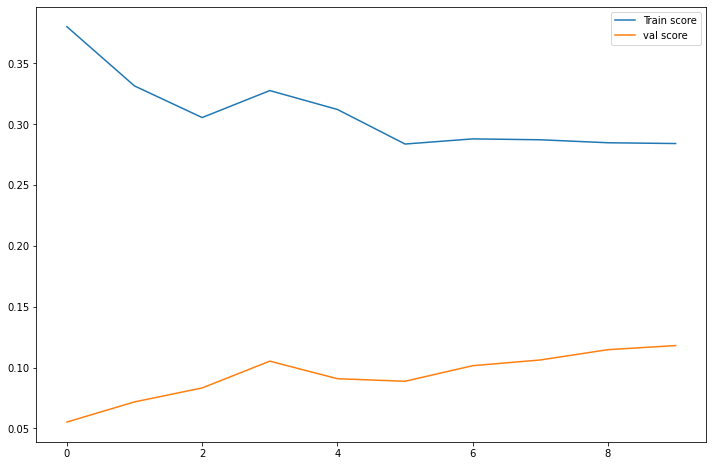

In [392]:
evaluation(model) #overfitting
# il faut faire plusieurs tests pour avoir le meilleur modèle